Fourier transform에 본격적으로 들어가기 전에 몇가지 개념을 리뷰해보록 한다.

- 복소수
- 지수 함수

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from math import gcd
from IPython.display import Image

# 복소수 (Complex Numbers)

- 푸리에 변환(Fourier transform)의 복소수-값 공식을 위해 복소수가 필요하며, 이는 변환의 특정 대수적 특성에 대한 증명과 이해를 상당히 단순화한다.

## 기본 개념

- 실수 부분 $\mathrm{Re}(c) = a$, 허수 부분 $\mathrm{Im}(c) = b$ 및 허수 단위 $i = \sqrt{-1}$로 복소수 $c = a + ib$를 쓸 수 있다. 파이썬에서 기호 `j`는 허수의 단위를 나타내기 위해 사용된다. 또한 `j` 앞의 계수가 필요하다. 복소수를 지정하기 위해 `complex`라는 생성자를 사용할 수도 있다.

In [2]:
a = 1.5
b = 0.8
c = a + b*1j
print(c)
c2 = complex(a,b)
print(c2)

(1.5+0.8j)
(1.5+0.8j)


In [4]:
print(np.real(c))
print(np.imag(c))

1.5
0.8


In [9]:
def generate_figure(figsize=(6, 2), xlim=[0, 1], ylim=[0, 1]):
    """Generate figure for plotting complex numbers

    Args:
        figsize: Figure size (Default value = (2, 2))
        xlim: Limits of x-axis (Default value = [0, 1])
        ylim: Limits of y-axis (Default value = [0, 1])
    """
    plt.figure(figsize=figsize)
    plt.grid()
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel(r'$\mathrm{Re}$')
    plt.ylabel(r'$\mathrm{Im}$')

def plot_vector(c, color='k', start=0, linestyle='-'):
    """Plot arrow corresponding to difference of two complex numbers

    Args:
        c: Complex number
        color: Color of arrow (Default value = 'k')
        start: Complex number encoding the start position (Default value = 0)
        linestyle: Linestyle of arrow (Default value = '-')

    Returns:
        arrow (matplotlib.patches.FancyArrow): Arrow
    """
    return plt.arrow(np.real(start), np.imag(start), np.real(c), np.imag(c),
                     linestyle=linestyle, head_width=0.05, fc=color, ec=color, overhang=0.3,
                     length_includes_head=True)

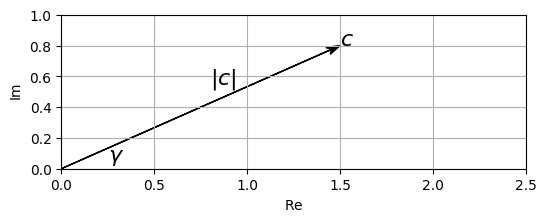

In [10]:
c = 1.5 + 0.8j

generate_figure(xlim=[0, 2.5], ylim=[0, 1])
v = plot_vector(c, color='k')

plt.text(1.5, 0.8, '$c$', size='16')
plt.text(0.8, 0.55, '$|c|$', size='16')
plt.text(0.25, 0.05, '$\gamma$', size='16');

## 극좌표 표현 Polar Representation

- 복소수 $a+ib$ 의 **절대값** (absolute value or modulus)은 다음과 같이 정의된다.
    - $|c| := \sqrt{a^2 + b^2}.$

- (radian으로 주어진) **각도**(angle)는 다음과 같다.
    - $\gamma := \mathrm{atan2}(b, a).$

- 이는 음의 값에 $2\pi$를 추가하여 $(-\pi,\pi]$ 간격의 숫자를 생성하며, 이 값은 $[0,2\pi)$에 매핑될 수 있다. **각도**(degree 단위로 제공)는 다음과 같이 구한다.
    - $360 \cdot \frac{\gamma}{2\pi}$

In [12]:
print('Absolute value:', np.abs(c))
print('Angle (in radians):', np.angle(c))
print('Angle (in degree):', np.rad2deg(np.angle(c)))
print('Angle (in degree):', 360 * np.angle(c)/(2*np.pi) )

Absolute value: 1.7
Angle (in radians): 0.48995732625372834
Angle (in degree): 28.07248693585296
Angle (in degree): 28.07248693585296


- 복소수 $c=a+ib$는 $(|c|, \gamma)$ 쌍에 의해 고유하게 정의되며, 이는 $c$의 **극좌표 표현**(polar representation)이라고도 한다. 다음과 같이 극좌표 표현 $(|c|,\gamma)$에서 데카르트 표현(Cartesian representation) $(a,b)$를 얻는다.


\begin{eqnarray}
a &=& |c| \cdot \cos(\gamma) \\
b &=& |c| \cdot \sin(\gamma)
\end{eqnarray}

## 연산

- 두 복소수 $c_1=a_1+ib_1$와 $c_2=a_2+ib_2$의 경우, 합은 다음과 같다.

$$
c_1 + c_2 = (a_1 + ib_1) + (a_2 + ib_2) := (a_1 + a_2) + i(b_1 + b_2)
$$

- 실수 부분과 허수 부분을 개별적으로 합산하여 정의한다. 덧셈의 기하학적 직관은 평행사변형으로 시각화할 수 있다.

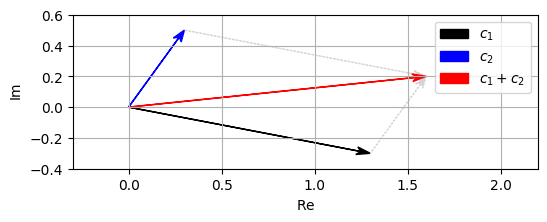

In [14]:
c1 = 1.3 - 0.3j
c2 = 0.3 + 0.5j
c = c1 + c2

generate_figure(xlim=[-0.3, 2.2], ylim=[-0.4, 0.6])
v1 = plot_vector(c1, color='k')
v2 = plot_vector(c2, color='b')
plot_vector(c1, start=c2, linestyle=':', color='lightgray')
plot_vector(c2, start=c1, linestyle=':', color='lightgray')
v3 = plot_vector(c, color='r')

plt.legend([v1, v2, v3], ['$c_1$', '$c_2$', '$c_1+c_2$']);

- 두 숫자 $c_1=a_1+ib_1$와 $c_2=a_2+ib_2$의 복소수 곱셈은 다음과 같이 정의된다.

$$c = c_1 \cdot c_2 = (a_1 + ib_1) \cdot (a_2 + ib_2) := (a_1a_2 - b_1b_2) + i(a_1b_2 + b_1a_2).$$

- 기하학적으로, 이 곱은 각도를 더하고 절대값을 곱함으로써 얻어진다. 다시 말해, $(|c_1|, \gamma_1)$와 $(|c_2|, \gamma_2)$가 각각 $c_1$와 $c_1$의 극좌표 표현이라면, $c$의 극좌표 표현 $(|c|, \gamma)$는 다음과 같이 주어진다.

\begin{eqnarray}
\gamma &=& \gamma_1 + \gamma_2 \\
|c| &=& |c_1| \cdot |c_2|
\end{eqnarray}

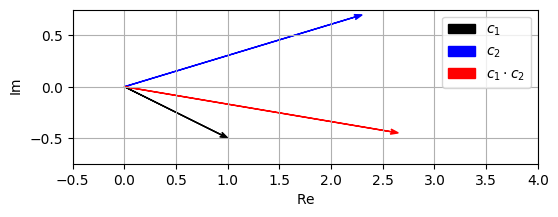

In [15]:
c1 = 1.0 - 0.5j
c2 = 2.3 + 0.7j
c = c1 * c2

generate_figure(xlim=[-0.5, 4.0], ylim=[-0.75, 0.75])
v1 = plot_vector(c1, color='k')
v2 = plot_vector(c2, color='b')
v3 = plot_vector(c, color='r')
plt.legend([v1, v2, v3], ['$c_1$', '$c_2$', '$c_1 \cdot c_2$']);

## 극좌표계 Polar Coordinate Plot

In [16]:
def plot_polar_vector(c, label=None, color=None, start=0, linestyle='-'):
    # plot line in polar plane
    line = plt.polar([np.angle(start), np.angle(c)], [np.abs(start), np.abs(c)], label=label, 
                     color=color, linestyle=linestyle)
    # plot arrow in same color
    this_color = line[0].get_color() if color is None else color
    plt.annotate('', xytext=(np.angle(start), np.abs(start)), xy=(np.angle(c), np.abs(c)),
                 arrowprops=dict(facecolor=this_color, edgecolor='none', 
                                 headlength=12, headwidth=10, shrink=1, width=0))

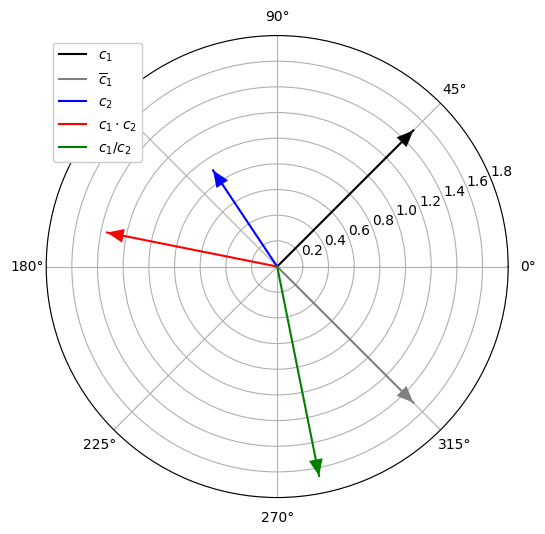

In [17]:
#head_width=0.05, fc=color, ec=color, overhang=0.3, length_includes_head=True    
    
c_abs = 1.5
c_angle = 45  # in degree
c_angle_rad = np.deg2rad(c_angle) 
a = c_abs * np.cos(c_angle_rad)
b = c_abs * np.sin(c_angle_rad)
c1 = a + b*1j    
c2 = -0.5 + 0.75*1j

plt.figure(figsize=(6, 6))
plot_polar_vector(c1, label='$c_1$', color='k')
plot_polar_vector(np.conj(c1), label='$\overline{c}_1$', color='gray')
plot_polar_vector(c2, label='$c_2$', color='b')
plot_polar_vector(c1*c2, label='$c_1\cdot c_2$', color='r')
plot_polar_vector(c1/c2, label='$c_1/c_2$', color='g')

plt.ylim([0, 1.8]);
plt.legend(framealpha=1);

# 지수 함수 (Exponential Function)

## Power Series 멱급수

- **실 지수 함수**(real exponential function) $\exp:\mathbb{R}\to \mathbb{R}$는 많은 수학 응용에서 볼 수 있다. 그리고 이 함수는 많은 다른 방식으로 특성화될 수 있다. 

- 역사적으로 지수 함수는 **금리**를 고려할 때 $17^\mathrm{th}$ 세기에 **Johann Bernoulli**에 의해 이미 연구되었다. 

- $1$의 이자를 매월 복합된 연간 금리로 이자 $a$를 얻는다고 가정하자. 그런 다음 매달 얻은 이자는 현재 값의 $\frac{a}{12}$배이므로, 매달 총 값에 $\left(1+\frac{a}{12}\right)$를 곱하고 연말의 값은 $\left(1+\frac{a}{12}\right)^{12}$이다. 매일 이자가 복합되는 경우 $\left(1+\frac{a}{365}\right)^{365}$가 된다.

- 시간 간격을 더 짧게 함으로써 매년 증가하도록 하는 것은 지수 함수의 limit 정의로 이어진다.
    - $\exp(a) = \mathrm{lim}_{n\to\infty} \left(1+\frac{a}{n}\right)^{n},$ Euler에 의해 제시

- 상수 $e:=\exp(1)\approx 2.71828 \ldots$는 **Euler의 숫자**로도 알려져 있다. 위의 정의에서 $n$-fold 곱을 확장하면 지수 함수가 다음과 같은 멱급수로 표현될 수 있음을 보여줄 수 있다.
$$\exp(a) := \sum_{n=0}^{\infty} \frac{a^n}{n!} = 1 + a + \frac{a^2}{1 \cdot 2} + \frac{a^3}{1 \cdot 2 \cdot 3} + \cdot$$

- 멱급수에서 실수값 변수 $a\in\mathbb{R}$를 복소수 값 변수 $c\in\mathbb{C}$로 바꾸면,  여전히 다음과 같이 주어진 **복소수 지수 함수** $\exp:\mathbb{C}\to \mathbb{C}$를 얻는다.

$$\exp(c) := \sum_{n=0}^{\infty} \frac{c^n}{n!} = 1 + c + \frac{c^2}{1 \cdot 2} + \frac{c^3}{1 \cdot 2 \cdot 3} + \cdot$$

- 복잡한 지수 함수의 정의를 기반으로 삼각 함수(예: $\sin$ 및 $\cos$)의 정의를 복잡한 인수로 확장할 수도 있다.

- 다음 구현은 매개 변수 $N\in\mathbb{N}$에 의해 지정된 첫 번째 $N$ 항만 고려하여 멱급수의 근사치를 산출한다. $c=1$의 경우, 숫자 $e$에 대한 근사치를 산출한다.

In [18]:
def exp_power_series(c, N):
    """Compute power series for exponential function

    Args:
        c: Complex number
        N: Number of summands used for approximation

    Returns:
        exp_c: Approximation of exp(c)
    """    
    exp_c = 1
    c_power = 1
    nfac = 1
    for n in range(1, N):
        nfac *= n
        c_power *= c 
        exp_c += c_power / nfac
    return exp_c

In [19]:
c=1
print('Approximation (N =  1):', exp_power_series(c, 1))
print('Approximation (N =  2):', exp_power_series(c, 2))
print('Approximation (N =  4):', exp_power_series(c, 4))
print('Approximation (N =  8):', exp_power_series(c, 8))
print('Approximation (N = 12):', exp_power_series(c, 12))
print('Numpy:                 ', np.exp(c))

Approximation (N =  1): 1
Approximation (N =  2): 2.0
Approximation (N =  4): 2.6666666666666665
Approximation (N =  8): 2.7182539682539684
Approximation (N = 12): 2.718281826198493
Numpy:                  2.718281828459045


## 지수 항등식과 오일러 공식 Exponentiation Identity and Euler's Formula 

- 멱급수 정의에 기초하여, 많은 속성을 설명하는 지수 함수의 두 가지 유명한 공식을 증명할 수 있다. 첫 번째 공식은 **지수 항등식 exponentation identity**로 알려져 있으며 다음과 같다.


$$
  \exp(c_1 + c_2) = \exp(c_1)\cdot \exp(c_2)
$$

for any complex numbers $c_1, c_2\in\mathbb{C}$. 

- 특히, 이 속성은 실수 인수의 기하급수적인 증가를 설명한다. 예를들면,

$$
  \exp(n) = \exp(1+1+\ldots +1) = \exp(1)^n = e^n
$$

for $n\in\mathbb{N}$. 

- **오일러 공식 Euler's formula**로 알려진 두 번째 공식은 순 허수(pure imaginary)의 인수에서 지수 함수의 값을 삼각 함수와 연관시킨다. 그것은 일부 실수 값 $\beta\in\mathbb{R}$와 함께 복소수 $c = i\gamma$에 대해, 다음의 항등식을 가진다.

$$\mathrm{exp}(i\gamma) = \cos(\gamma) + i\sin(\gamma) .$$

- 실제로 실수 사인 및 코사인 함수를 시작으로 오일러 공식을 사용하여 $\mathrm{exp}(i\gamma)$를 정의하는 경우가 많다. 
- 다음 그림에 나온 것처럼 허수(수직) 축을 따라 $\exp$의 실수 및 허수 부분의 주기적인 동작을 설명한다.

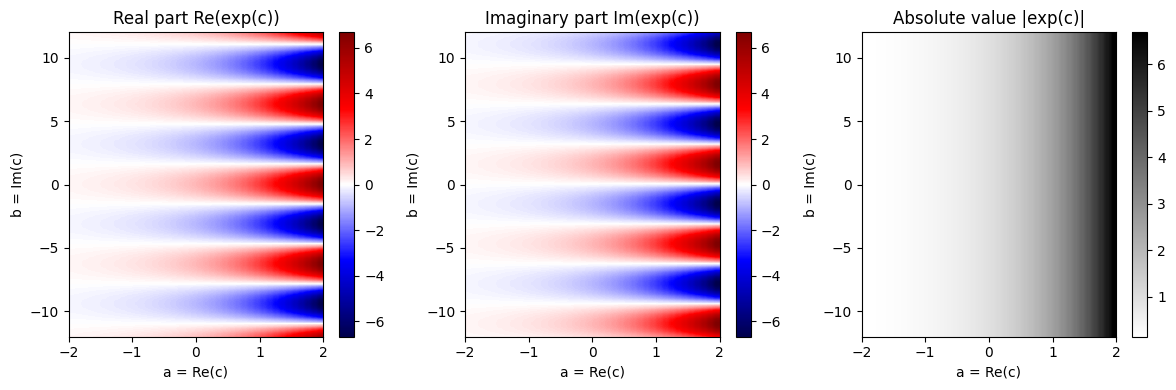

In [20]:
A, B = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-12, 12, 0.1))
C = A + B*1j
f_exp = np.exp(C)

plt.figure(figsize=(12, 4))
extent = [-2, 2, -12, 12]
plt.subplot(1, 3, 1)
plt.imshow(np.real(f_exp),  aspect='auto', cmap='seismic', origin='lower', extent=extent)
plt.title('Real part Re(exp(c))')
plt.xlabel('a = Re(c)')
plt.ylabel('b = Im(c)')
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(np.imag(f_exp),  aspect='auto', cmap='seismic', origin='lower', extent=extent)
plt.title('Imaginary part Im(exp(c))')
plt.xlabel('a = Re(c)')
plt.ylabel('b = Im(c)')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(np.abs(f_exp),  aspect='auto', cmap='gray_r', origin='lower', extent=extent)
plt.title('Absolute value |exp(c)|')
plt.xlabel('a = Re(c)')
plt.ylabel('b = Im(c)')
plt.colorbar()
plt.tight_layout()

## 기본 속성

- 지수 함수에는 여러 가지 흥미로운 속성이 있다:

\begin{eqnarray}
\exp(i\gamma) & = & \exp(i(\gamma+2\pi)) \\
|\exp(i\gamma)|  & = & 1 \\
\overline{\exp(i\gamma)} & = & \exp(-i\gamma) \\
\exp(i(\gamma_1+\gamma_2)) & = & \exp(i\gamma_1) \exp(i\gamma_2) \\
\frac{d\exp(i\gamma)}{d\gamma} & = & i\exp(i\gamma)
\end{eqnarray}

- 특히, 복소수 값 $\mathrm{exp}(i\gamma)$은 모든 $\gamma\in\mathbb{R}$에 대해 복소수 평면의 단위 원(unit circle)에 있다. 또한 주기성(periodicity)으로 인해 $\gamma\in[0,2\pi)$을 고려하기에 충분하다. 

- 실제로 $\gamma$는 복소수 $c = \mathrm{exp}(i\gamma)$의 각도(라디안 단위)를 인코딩한다.($|c|=1$) 

- 다음 그림은 각도 $\gamma$를 $0$에서 $2\pi$로 증가시킬 때 값 $\mathrm{exp}(i\gamma)$이 어떻게 변하는지 보여준다.

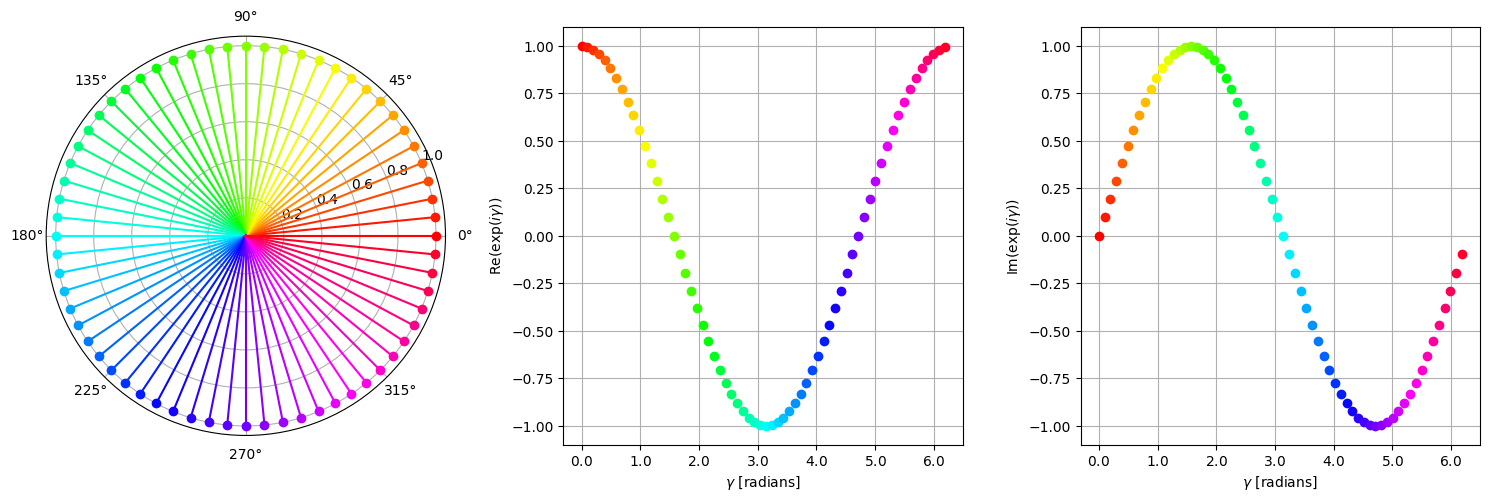

In [21]:
from matplotlib import ticker 
%matplotlib inline

cmap = plt.cm.get_cmap('hsv') # hsv is nice because it is a circular color map

N = 64

fig = plt.figure(figsize=(5 * 3, 5))
ax1 = fig.add_subplot(1, 3, 1, projection='polar')
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

for i in range(N):
    gamma = 2 * np.pi * i / N
    c = np.exp(1j * gamma)
    color = cmap(i / N)
    ax1.plot([0, np.angle(c)], [0, np.abs(c)], color=color)
    ax1.plot(np.angle(c), np.abs(c), 'o', color=color)
    ax2.plot(gamma, np.real(c), 'o', color=color)
    ax3.plot(gamma, np.imag(c), 'o', color=color)
    
ax2.grid()
ax2.set_xlabel('$\gamma$ [radians]')
ax2.set_ylabel('$\mathrm{Re}(\exp(i \gamma))$')
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%s$')) 

ax3.grid()
ax3.set_xlabel('$\gamma$ [radians]')
ax3.set_ylabel('$\mathrm{Im}(\exp(i \gamma))$')
ax3.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%s$')) 
plt.tight_layout()

## Roots of Unity

- $N \in \mathbb{N}_{>0}$를 양의 정수라고 하자. 복소수 $\rho \in \mathbb{C}$는 $\rho^N = 1$인 경우 $N^\mathrm{th}$ **root of unity**(1의 거듭제곱근)라고 한다. 
    - 다시말해 1의 거듭제곱근은 거듭제곱하여 1이 되는 복소수이다.

- 정확히 $N$개의 뚜렷한 $N^\mathrm{th}$ root of unity가 있다는 것을 보이는 것은 어렵지 않다. 

- 또한, 모든 $n\in [1:N-1]$에 대해 $\rho^n \neq 1$인 경우, **primitive** $N^\mathrm{th}$ root of unity (단위 n승근)라고 한다.

- 위에서 언급한 속성을 통해 $\rho_N:=\exp(2 \pi i / N)$ 이 **primitive** $N^\mathrm{th}$ root of unity 임을 쉽게 알 수 있다. 

- 모든 $N^\mathrm{th}$ root of unity는 $\rho_N$의 power을 고려하여 생성될 수 있다.:

$$1=\rho_N^0, \quad \rho_N^1, \quad \rho_N^2, \quad ...,\quad \rho_N^{N-1}$$

- 다음 그림은 서로 다른 정수 $N \in \mathbb{N}_{>0}$에 대한 모든 root of unity를 보여준다. primitive root는 빨간색으로 표시되어 있다.

In [25]:
def plot_root_unity(N, figsize=(5, 5)): 
    root_unity = np.exp(2j * np.pi / N)
    root_unity_power = 1

    fig, ax = plt.subplots(figsize=figsize)
    plt.grid()  
    plt.xlim([-1.4, 1.4])
    plt.ylim([-1.4, 1.4])
    plt.xlabel('$\mathrm{Re}$')
    plt.ylabel('$\mathrm{Im}$')
    plt.title('Roots of unity for $N=%d$'%N)

    for n in range(0, N):
        colorPlot = 'r' if gcd(n, N) == 1 else 'k'
        plot_vector(root_unity_power, color=colorPlot)
        plt.text(np.real(1.2*root_unity_power), np.imag(1.2*root_unity_power), 
                 r'$\rho_{%s}^{%s}$' % (N, n), size='18', 
                 color=colorPlot, ha='center', va='center')
        root_unity_power *= root_unity

    circle_unit = plt.Circle((0, 0), 1, color='lightgray', fill=0)   
    ax.add_artist(circle_unit)

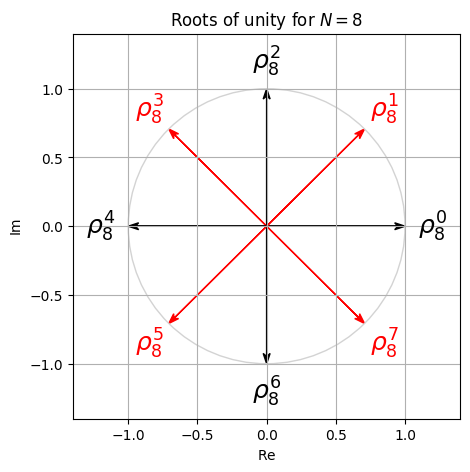

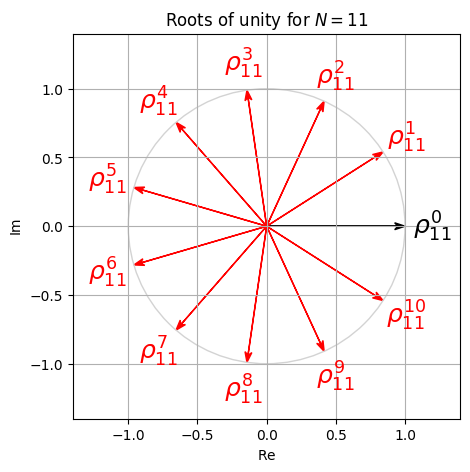

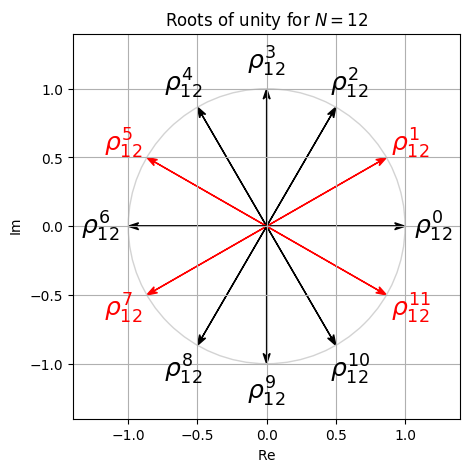

In [26]:
plot_root_unity(N=8)    
plot_root_unity(N=11)
plot_root_unity(N=12)

출처: https://www.audiolabs-erlangen.de/resources/MIR/FMP/C2/C2.html